### Auditory Gating Statistical Analysis and Figures

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg
import numpy as np

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
ag_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/AEP_analysis.csv')

In [3]:
ag_df['Group'] = ag_df['Genotype'] +'_'+ag_df['Tx']

In [4]:
ag_df.columns

Index(['ID', 'Channel', 'Genotype', 'Tx', 'Sex', 'CAMP', 'CLAT', 'TAMP',
       'TLAT', 'T/C', 'Group'],
      dtype='object')

In [5]:
ag_df.groupby(['Genotype', 'Tx'])['ID'].count()

Genotype  Tx      
KO        0.5mg/kg    6
          Saline      4
WT        0.5mg/kg    6
          1mg/kg      5
          Saline      5
Name: ID, dtype: int64

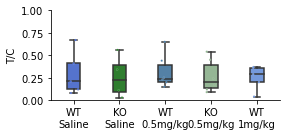

In [15]:
TC_fig = plt.figure(figsize=(4, 2))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'T/C', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'T/C', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('T/C')
ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO\nSaline', 'WT\n0.5mg/kg', 'KO\n0.5mg/kg', 'WT\n1mg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [14]:
TC_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/TC.svg')

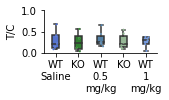

In [31]:
TC_fig_paper = plt.figure(figsize=(2.5, 1.5))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'TC', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'TC', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('T/C')
ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO', 'WT\n0.5\nmg/kg', 'KO', 'WT\n1\nmg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [32]:
TC_fig_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/TC_paper.svg')

In [16]:
pg.normality(data = ag_df, dv = 'T/C', group = 'Group')

,W,pval,normal
WT_1mg/kg,0.890968,0.361992,True
KO_0.5mg/kg,0.880625,0.271941,True
WT_0.5mg/kg,0.849584,0.156191,True
WT_Saline,0.897787,0.397776,True
KO_Saline,0.943028,0.672875,True


In [20]:
ag_df.rename(columns={'T/C':'TC'}, inplace=True)

In [22]:
pg.anova(data = ag_df[ag_df['Genotype']=='WT'], dv = 'TC', between = ['Tx'])

,Source,ddof1,ddof2,F,p-unc,np2
0,Tx,2,13,0.170157,0.845381,0.02551


In [65]:
pg.anova(data = ag_df, dv = 'TC', between = ['Group'])

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,4,21,0.109994,0.977672,0.020521


In [23]:
pg.anova(data = ag_df[ag_df['Group']!='WT_1mg/kg'], dv = 'TC', between = ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,0.010979,1.0,0.010979,0.245461,0.626633,0.014233
1,Tx,0.001248,1.0,0.001248,0.027908,0.869297,0.001639
2,Genotype * Tx,0.000238,1.0,0.000238,0.005331,0.942648,0.000313
3,Residual,0.760363,17.0,0.044727,NaN,NaN,NaN


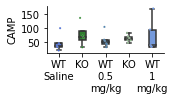

In [35]:
CAMP_fig = plt.figure(figsize=(4, 2))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'CAMP', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'CAMP', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('CAMP')
#ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO', 'WT\n0.5\nmg/kg', 'KO', 'WT\n1\nmg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [34]:
CAMP_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/CAMP_fig.svg')

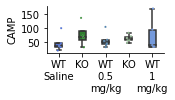

In [36]:
CAMP_fig_paper = plt.figure(figsize=(2.5, 1.5))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'CAMP', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'CAMP', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('CAMP')
#ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO', 'WT\n0.5\nmg/kg', 'KO', 'WT\n1\nmg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [37]:
CAMP_fig_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/CAMP_fig_paper.svg')

In [44]:
pg.normality(data = ag_df, dv = 'CAMP', group = 'Group')

,W,pval,normal
WT_1mg/kg,0.789963,0.066953,True
KO_0.5mg/kg,0.962150,0.836150,True
WT_0.5mg/kg,0.834174,0.116565,True
WT_Saline,0.822677,0.122434,True
KO_Saline,0.933139,0.612968,True


In [38]:
pg.anova(data = ag_df[ag_df['Genotype']=='WT'], dv = 'CAMP', between = 'Tx')

,Source,ddof1,ddof2,F,p-unc,np2
0,Tx,2,13,0.596994,0.564876,0.084119


In [61]:
pg.anova(data = ag_df, dv = 'CAMP', between = 'Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,4,21,0.561858,0.69288,0.096674


In [39]:
pg.anova(data = ag_df[ag_df['Group']!='WT_1mg/kg'], dv = 'CAMP', between = ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,1508.296809,1.0,1508.296809,1.835644,0.193195,0.097456
1,Tx,13.613169,1.0,13.613169,0.016568,0.899093,0.000974
2,Genotype * Tx,661.027909,1.0,661.027909,0.804491,0.382280,0.045185
3,Residual,13968.423063,17.0,821.671945,NaN,NaN,NaN


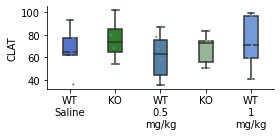

In [40]:
CLAT_fig = plt.figure(figsize=(4, 2))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'CLAT', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'CLAT', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('CLAT')
#ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO', 'WT\n0.5\nmg/kg', 'KO', 'WT\n1\nmg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [41]:
CLAT_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/CLAT_fig.svg')

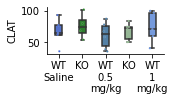

In [44]:
CLAT_fig_paper = plt.figure(figsize=(2.5, 1.5))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'CLAT', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'CLAT', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('CLAT')
#ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO', 'WT\n0.5\nmg/kg', 'KO', 'WT\n1\nmg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [45]:
CLAT_fig_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/CLAT_fig_paper.svg')

In [42]:
pg.anova(data = ag_df[ag_df['Genotype']=='WT'], dv = 'CLAT', between = 'Tx')

,Source,ddof1,ddof2,F,p-unc,np2
0,Tx,2,13,0.432158,0.6581,0.062341


In [62]:
pg.anova(data = ag_df, dv = 'CLAT', between = 'Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,4,21,0.435476,0.781476,0.076595


In [43]:
pg.anova(data = ag_df[ag_df['Group']!='WT_1mg/kg'], dv = 'CLAT', between = ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,307.541519,1.0,307.541519,0.864290,0.365555,0.048381
1,Tx,249.620063,1.0,249.620063,0.701513,0.413897,0.039630
2,Genotype * Tx,11.205184,1.0,11.205184,0.031490,0.861248,0.001849
3,Residual,6049.130987,17.0,355.831235,NaN,NaN,NaN


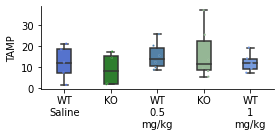

In [46]:
TAMP_fig = plt.figure(figsize=(4, 2))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'TAMP', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'TAMP', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('TAMP')
#ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO', 'WT\n0.5\nmg/kg', 'KO', 'WT\n1\nmg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [47]:
TAMP_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/TAMP_fig.svg')

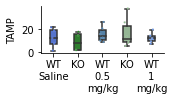

In [48]:
TAMP_fig_paper = plt.figure(figsize=(2.5, 1.5))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'TAMP', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'TAMP', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('TAMP')
#ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO', 'WT\n0.5\nmg/kg', 'KO', 'WT\n1\nmg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [49]:
TAMP_fig_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/TAMP_fig_paper.svg')

In [50]:
pg.normality(data = ag_df, dv = 'TAMP', group = 'Group')

,W,pval,normal
WT_1mg/kg,0.963395,0.831402,True
KO_0.5mg/kg,0.866089,0.211057,True
WT_0.5mg/kg,0.927310,0.559493,True
WT_Saline,0.962706,0.826689,True
KO_Saline,0.813842,0.129450,True


In [52]:
pg.anova(data = ag_df[ag_df['Genotype']=='WT'], dv = 'TAMP', between = 'Tx')

,Source,ddof1,ddof2,F,p-unc,np2
0,Tx,2,13,0.430946,0.658849,0.062177


In [63]:
pg.anova(data = ag_df, dv = 'TAMP', between = 'Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,4,21,0.606511,0.662322,0.103562


In [53]:
pg.anova(data = ag_df[ag_df['Group']!='WT_1mg/kg'], dv = 'TAMP', between = ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,2.674499,1.0,2.674499,0.031766,0.860649,0.001865
1,Tx,143.032335,1.0,143.032335,1.698851,0.209815,0.090853
2,Genotype * Tx,24.058376,1.0,24.058376,0.285751,0.599879,0.016531
3,Residual,1431.290972,17.0,84.193587,NaN,NaN,NaN


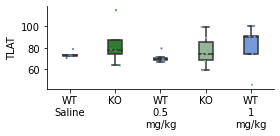

In [54]:
TLAT_fig = plt.figure(figsize=(4, 2))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'TLAT', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'TLAT', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('TLAT')
#ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO', 'WT\n0.5\nmg/kg', 'KO', 'WT\n1\nmg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [55]:
TLAT_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/TLAT_fig.svg')

In [56]:
pg.normality(data = ag_df, dv = 'TLAT', group = 'Group')

,W,pval,normal
WT_1mg/kg,0.880003,0.309326,True
KO_0.5mg/kg,0.953862,0.771411,True
WT_0.5mg/kg,0.779989,0.038537,False
WT_Saline,0.829284,0.137409,True
KO_Saline,0.865437,0.280158,True


In [56]:
pg.anova(data = ag_df[ag_df['Genotype']=='WT'], dv = 'TLAT', between = 'Tx')

,Source,ddof1,ddof2,F,p-unc,np2
0,Tx,2,13,0.798842,0.470745,0.109448


In [64]:
pg.anova(data = ag_df, dv = 'TLAT', between = 'Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,4,21,0.592691,0.671716,0.101441


In [57]:
pg.anova(data = ag_df[ag_df['Group']!='WT_1mg/kg'], dv = 'TLAT', between = ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,339.290179,1.0,339.290179,2.120577,0.163553,0.110905
1,Tx,104.187585,1.0,104.187585,0.651176,0.430838,0.036891
2,Genotype * Tx,16.729021,1.0,16.729021,0.104557,0.750372,0.006113
3,Residual,2719.983467,17.0,159.999027,NaN,NaN,NaN


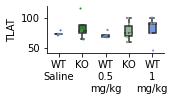

In [58]:
TLAT_fig_paper = plt.figure(figsize=(2.5, 1.5))
ax = sns.boxplot(data = ag_df, x= 'Group', y= 'TLAT', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], showfliers = False, dodge=False, width=0.3)
sns.stripplot(data = ag_df, x= 'Group', y= 'TLAT', order = ['WT_Saline', 'KO_Saline', 'WT_0.5mg/kg', 'KO_0.5mg/kg', 'WT_1mg/kg'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen', 'cornflowerblue'], dodge=False, edgecolor='silver', size=2, linewidth=0.2)
sns.despine()
ax.set_ylabel('TLAT')
#ax.set_ylim([0.0, 1.0])
ax.set_xticklabels(['WT\nSaline', 'KO', 'WT\n0.5\nmg/kg', 'KO', 'WT\n1\nmg/kg'])
ax.set_xlabel('')
plt.tight_layout()

In [59]:
TLAT_fig_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Sensory_Gating/Figures/TLAT_fig_paper.svg')